In [2]:
import pandas as pd
air_q = pd.read_csv('../data/origin_datasets/air_quality_Nov2017.csv')

In [26]:
air_q.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [27]:
air_q.shape

(5744, 15)

In [28]:
air_q.duplicated().value_counts()

False    5744
dtype: int64

In [29]:
air_q.isna().sum()

Station            0
Air Quality        0
Longitude          0
Latitude           0
O3 Hour         1476
O3 Quality      1476
O3 Value        1643
NO2 Hour          55
NO2 Quality       55
NO2 Value        284
PM10 Hour       2022
PM10 Quality    2022
PM10 Value      2097
Generated          0
Date Time          0
dtype: int64

<AxesSubplot:>

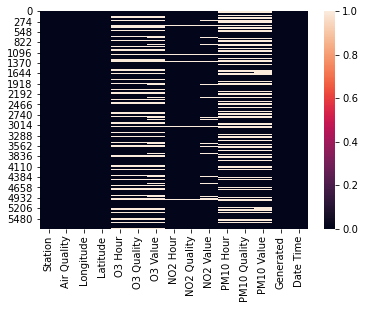

In [30]:
import seaborn as sns

sns.heatmap(air_q.isnull())

In [31]:
air_q.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Station       5744 non-null   object 
 1   Air Quality   5744 non-null   object 
 2   Longitude     5744 non-null   float64
 3   Latitude      5744 non-null   float64
 4   O3 Hour       4268 non-null   object 
 5   O3 Quality    4268 non-null   object 
 6   O3 Value      4101 non-null   float64
 7   NO2 Hour      5689 non-null   object 
 8   NO2 Quality   5689 non-null   object 
 9   NO2 Value     5460 non-null   float64
 10  PM10 Hour     3722 non-null   object 
 11  PM10 Quality  3722 non-null   object 
 12  PM10 Value    3647 non-null   float64
 13  Generated     5744 non-null   object 
 14  Date Time     5744 non-null   int64  
dtypes: float64(5), int64(1), object(9)
memory usage: 673.2+ KB


In [32]:
air_q.describe()

,Longitude,Latitude,O3 Value,NO2 Value,PM10 Value,Date Time
count,5744.00000,5744.000000,4101.000000,5460.000000,3647.000000,5.744000e+03
mean,2.15240,13877.827714,34.082907,35.740293,16.590074,1.542323e+09
std,0.02859,74410.803168,22.960687,22.357262,8.065424,7.483961e+05
min,2.11510,41.378800,1.000000,1.000000,2.000000,1.541027e+09
25%,2.13080,41.386400,14.000000,17.000000,10.000000,1.541675e+09
50%,2.15070,41.398700,34.000000,33.000000,15.000000,1.542325e+09
75%,2.16220,41.418300,52.000000,52.000000,22.000000,1.542971e+09
max,2.20450,414261.000000,100.000000,117.000000,44.000000,1.543616e+09


In [33]:
air_q['Station'].unique()

array(['Barcelona - Sants', 'Barcelona - Eixample', 'Barcelona - Gràcia',
       'Barcelona - Ciutadella', 'Barcelona - Vall Hebron',
       'Barcelona - Palau Reial', 'Barcelona - Poblenou',
       'Barcelona - Observ Fabra'], dtype=object)

In [34]:
air_q['O3 Value'].fillna(34, inplace=True)
air_q['O3 Value']

0       34.0
1        1.0
2       10.0
3        2.0
4        7.0
        ... 
5739    10.0
5740    32.0
5741    40.0
5742    34.0
5743    64.0
Name: O3 Value, Length: 5744, dtype: float64

In [35]:
air_q['NO2 Value'].fillna(36, inplace=True)
air_q['NO2 Value']

0        84.0
1       113.0
2        73.0
3        86.0
4        69.0
        ...  
5739     57.0
5740     31.0
5741     20.0
5742     70.0
5743     21.0
Name: NO2 Value, Length: 5744, dtype: float64

In [36]:
air_q['PM10 Value'].fillna(17, inplace=True)
air_q['PM10 Value']

0       17.0
1       36.0
2       17.0
3       17.0
4       17.0
        ... 
5739    17.0
5740    21.0
5741    15.0
5742    25.0
5743    12.0
Name: PM10 Value, Length: 5744, dtype: float64

In [37]:
import numpy as np
air_q['O3 Quality'] = np.where(air_q['O3 Value'] >= 100, 'Moderate', 'Good')
air_q['O3 Quality']

0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
5739    Good
5740    Good
5741    Good
5742    Good
5743    Good
Name: O3 Quality, Length: 5744, dtype: object

In [38]:
air_q['NO2 Quality'] = np.where(air_q['NO2 Value'] >= 100, 'Moderate', 'Good')
air_q['NO2 Quality']

0           Good
1       Moderate
2           Good
3           Good
4           Good
          ...   
5739        Good
5740        Good
5741        Good
5742        Good
5743        Good
Name: NO2 Quality, Length: 5744, dtype: object

In [39]:
air_q['PM10 Quality'] = np.where(air_q['PM10 Value'] >= 35, 'Moderate', 'Good')
air_q['PM10 Quality']

0           Good
1       Moderate
2           Good
3           Good
4           Good
          ...   
5739        Good
5740        Good
5741        Good
5742        Good
5743        Good
Name: PM10 Quality, Length: 5744, dtype: object

In [40]:
air_q['Air Quality'] = np.where(air_q['PM10 Quality']=='Moderate', 'Moderate', 'Good')
air_q['Air Quality'] = np.where(air_q['PM10 Quality']=='Good', 'Good', 'Moderate')
air_q['Air Quality'].unique()

array(['Good', 'Moderate'], dtype=object)

In [41]:
air_q=air_q.drop(['Date Time'], axis=1)
air_q=air_q.drop(['PM10 Hour'], axis=1)
air_q=air_q.drop(['NO2 Hour'], axis=1)
air_q=air_q.drop(['O3 Hour'], axis=1)
air_q

,Station,Air Quality,Longitude,Latitude,O3 Quality,O3 Value,NO2 Quality,NO2 Value,PM10 Quality,PM10 Value,Generated
0,Barcelona - Sants,Good,2.1331,41.3788,Good,34.0,Good,84.0,Good,17.0,01/11/2018 0:00
1,Barcelona - Eixample,Moderate,2.1538,41.3853,Good,1.0,Moderate,113.0,Moderate,36.0,01/11/2018 0:00
2,Barcelona - Gràcia,Good,2.1534,41.3987,Good,10.0,Good,73.0,Good,17.0,01/11/2018 0:00
3,Barcelona - Ciutadella,Good,2.1874,41.3864,Good,2.0,Good,86.0,Good,17.0,01/11/2018 0:00
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,Good,7.0,Good,69.0,Good,17.0,01/11/2018 0:00
...,...,...,...,...,...,...,...,...,...,...,...
5739,Barcelona - Ciutadella,Good,2.1874,41.3864,Good,10.0,Good,57.0,Good,17.0,30/11/2018 23:00
5740,Barcelona - Vall Hebron,Good,2.1480,41.4261,Good,32.0,Good,31.0,Good,21.0,30/11/2018 23:00
5741,Barcelona - Palau Reial,Good,2.1151,41.3875,Good,40.0,Good,20.0,Good,15.0,30/11/2018 23:00
5742,Barcelona - Poblenou,Good,2.2045,41.4039,Good,34.0,Good,70.0,Good,25.0,30/11/2018 23:00


In [42]:
air_q.columns = ['Station','Air_Quality', 'Longitude', 'Latitude', 'O3_Quality',
       'O3_Value', 'NO2_Quality', 'NO2_Value', 'PM10_Quality', 'PM10_Value',
       'Date']
air_q.head()

,Station,Air_Quality,Longitude,Latitude,O3_Quality,O3_Value,NO2_Quality,NO2_Value,PM10_Quality,PM10_Value,Date
0,Barcelona - Sants,Good,2.1331,41.3788,Good,34.0,Good,84.0,Good,17.0,01/11/2018 0:00
1,Barcelona - Eixample,Moderate,2.1538,41.3853,Good,1.0,Moderate,113.0,Moderate,36.0,01/11/2018 0:00
2,Barcelona - Gràcia,Good,2.1534,41.3987,Good,10.0,Good,73.0,Good,17.0,01/11/2018 0:00
3,Barcelona - Ciutadella,Good,2.1874,41.3864,Good,2.0,Good,86.0,Good,17.0,01/11/2018 0:00
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,Good,7.0,Good,69.0,Good,17.0,01/11/2018 0:00


In [46]:
air_q.loc[air_q['Latitude']>1000, 'Latitude']=air_q[air_q['Latitude']>1000]['Latitude']/10000
air_q['Latitude']

0       41.3788
1       41.3853
2       41.3987
3       41.3864
4       41.4261
         ...   
5739    41.3864
5740    41.4261
5741    41.3875
5742    41.4039
5743    41.4183
Name: Latitude, Length: 5744, dtype: float64

In [50]:
air_q.to_csv('Air_QA_Final.csv', header=True, index=False)